<a href="https://colab.research.google.com/github/Dee-6777/Loan-prediction/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Choose an appropriate model for the project to predict the customers who are eligible for the loan and
also find out what are the missing criteria why other customers are not eligible for the loan and answer
the following questions.

#Importing the libraries

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score







dataset : https://drive.google.com/file/d/1MnHp15OkJb5-Zw3K5F29mH9o9CG7L-8x/view?usp=sharing

# Defining a DataFrame

In [ ]:
loan_train = pd.read_csv('/content/drive/MyDrive/project 1/Training Data.csv')
loan_test = pd.read_csv('/content/drive/MyDrive/project 1/Testing Data.csv')

# Exploratory Data Analysis

target column - Loan_Status

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


ApplicantIncome LoanAmount Loan_Amount_Term Credit_History

In [ ]:
#rows

loan_train.shape[0]

614

In [ ]:
#columns

loan_train.shape[1]

13

In [ ]:
loan_train.shape

(614, 13)

In [ ]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_train.isnull().sum().sum()

149

# Data Cleaning & Data Manipulation

In [ ]:
import missingno as msno

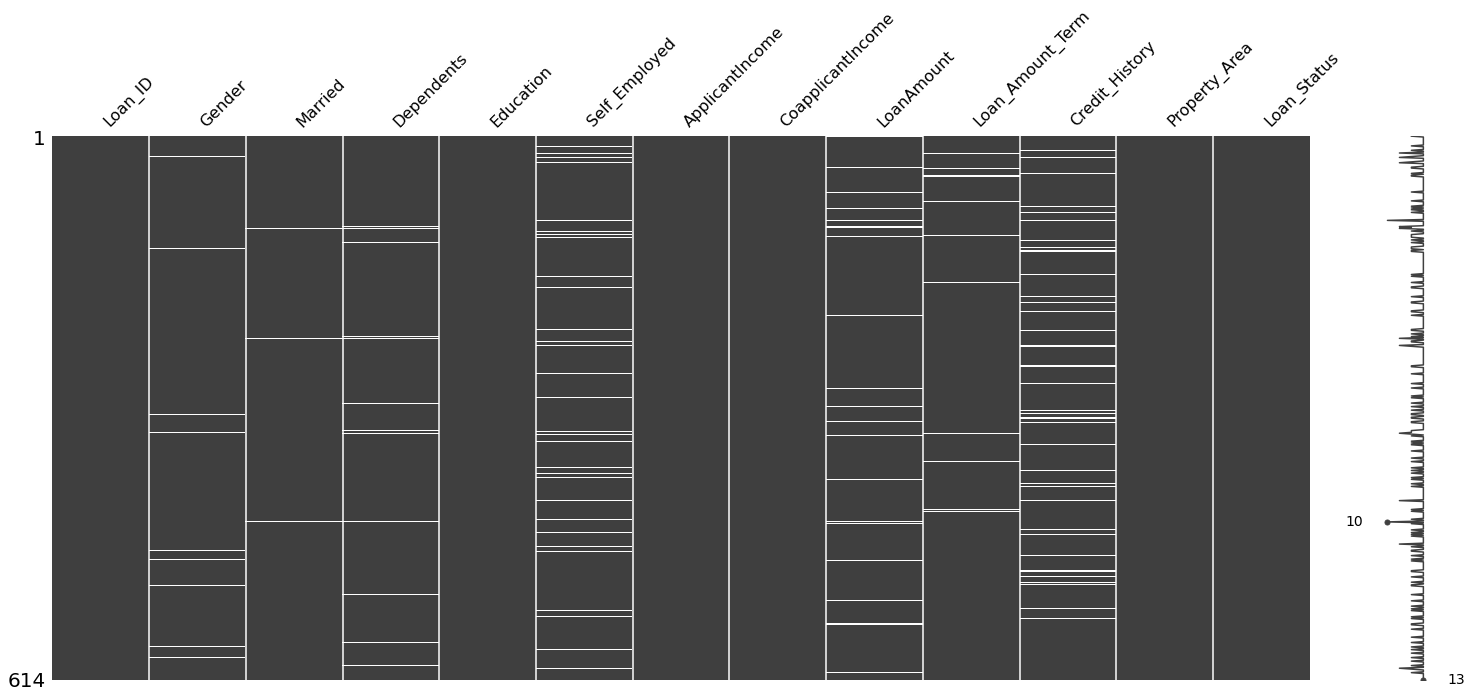

In [ ]:
msno.matrix(loan_train)

As we can see here, there are too many columns missing with small amount of null values so we use mean amd mode to replace with NaN values

In [ ]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

In [ ]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

In [ ]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

5. Which type of encoding will be required to perform on the "Education" column?
Here, Property_Area, Dependents and Education has multiple values so now we can use LabelEncoder from sklearn package

In [ ]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [ ]:
loan_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_train.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents             int64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
loan_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,582.000000,614.000000,614.000000,614.000000,600.00000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.348211,6109.041673,2926.248369,84.037468,65.12041,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [ ]:
loan_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.004474,0.058809,0.082912,0.107930,-0.074539,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.000394,0.051708,0.075948,0.147141,-0.102049,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.057161,0.118202,0.030430,0.163106,-0.102028,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.012333,-0.140760,-0.062290,-0.166998,-0.078784,-0.077936,-0.065243,-0.085884
Self_Employed,-0.004474,0.000394,0.057161,-0.012333,1.000000,0.140826,-0.011152,0.121649,-0.037069,0.003781,-0.031214,-0.002303
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.140826,1.000000,-0.116605,0.565620,-0.045306,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.011152,-0.116605,1.000000,0.187828,-0.059878,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.121649,0.565620,0.187828,1.000000,0.038926,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.074539,-0.102049,-0.102028,-0.078784,-0.037069,-0.045306,-0.059878,0.038926,1.000000,0.001439,-0.078748,-0.021268
Credit_History,0.012819,0.005852,-0.037392,-0.077936,0.003781,-0.014477,-0.001665,-0.007738,0.001439,1.000000,-0.001880,0.540483


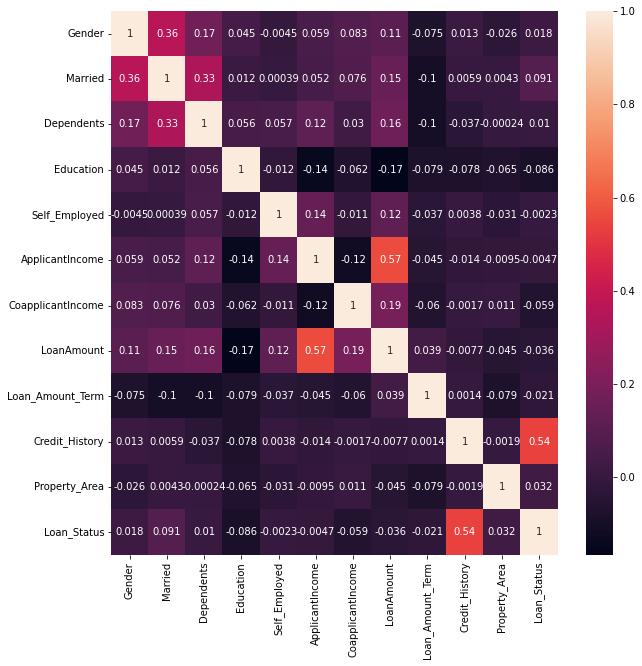

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_train.corr(), annot=True )

# Data Analysis and Data Visualisation

1. What's the ratio of Male to Female?

In [ ]:
print("Male : Female")
print(loan_train['Gender'].tolist().count(1),":",loan_train['Gender'].tolist().count(0))

Male : Female
502 : 112


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


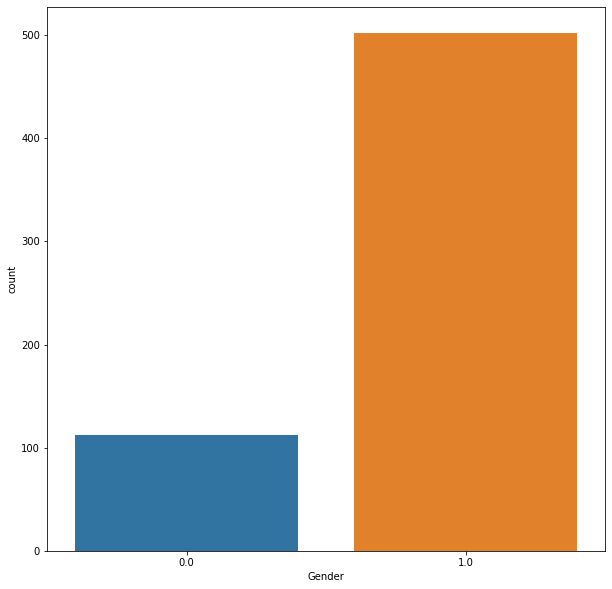

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(loan_train["Gender"])

2. How many **males** are married and non-married?

In [ ]:
print("Married :",loan_train[(loan_train["Gender"] == 1) & (loan_train["Married"]==1)]["Loan_ID"].count())
print("Unmarried :",loan_train[(loan_train["Gender"] == 1) & (loan_train["Married"]==0)]["Loan_ID"].count())

Married : 369
Unmarried : 133


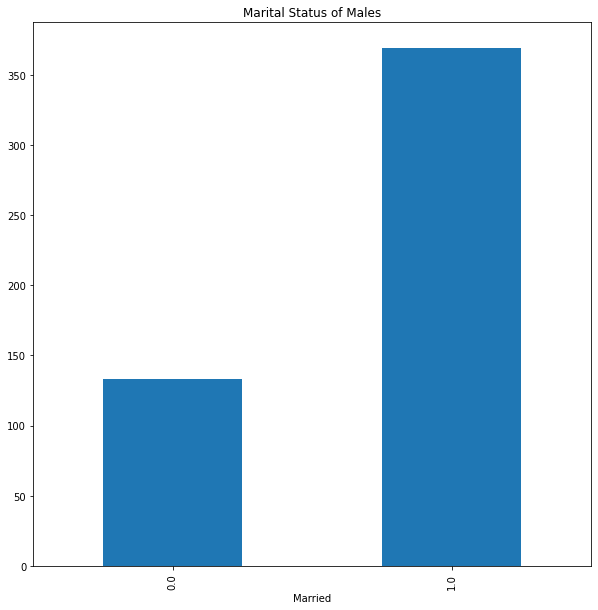

In [ ]:
loan_train[loan_train["Gender"] == 1].groupby("Married")["Loan_ID"].count().plot.bar(figsize=(10,10), title='Marital Status of Males')

3. How many Females are married and non-married?

In [ ]:
print("Married :",loan_train[(loan_train["Gender"] == 0) & (loan_train["Married"]==1)]["Loan_ID"].count())
print("UnMarried :",loan_train[(loan_train["Gender"] == 0) & (loan_train["Married"]==0)]["Loan_ID"].count())

Married : 32
UnMarried : 80


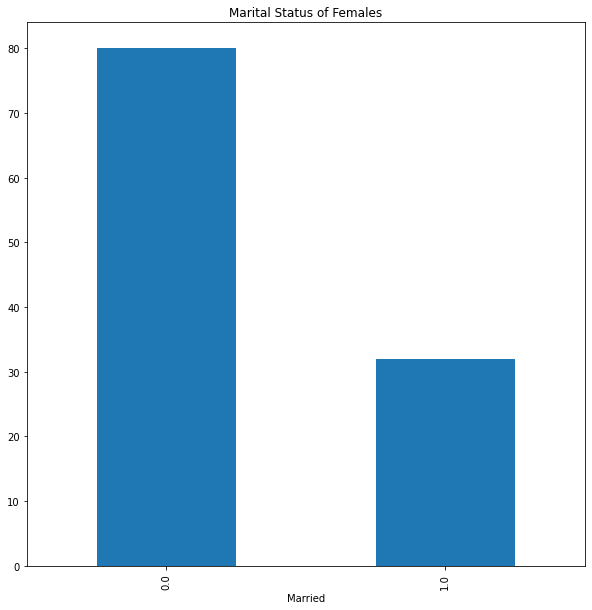

In [ ]:
loan_train[loan_train["Gender"] == 0].groupby("Married")["Loan_ID"].count().plot.bar(figsize=(10,10), title='Marital Status of Females')

4. How many Males and Females are graduated and non-graduated with respect to their Marital status?

In [ ]:
loan_train.groupby(["Education","Gender","Married"])["Loan_ID"].count()

Education  Gender  Married
0          0.0     0.0         66
                   1.0         26
           1.0     0.0        102
                   1.0        286
1          0.0     0.0         14
                   1.0          6
           1.0     0.0         31
                   1.0         83
Name: Loan_ID, dtype: int64

6. Is it a male or a female whose loan amount is the highest?

In [ ]:
loan_train[loan_train["LoanAmount"] == loan_train.LoanAmount.max()]["Gender"]

171    1.0
Name: Gender, dtype: float64

7. The specification and information about the applicant who has the highest income?

In [ ]:
loan_train[loan_train["LoanAmount"] == loan_train.LoanAmount.max()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,1.0,1.0,3,0,0.0,51763,0.0,700.0,300.0,1.0,2,1


# Choosing the model

8. Which model are you going to choose and define the reason for going with the same model?
What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)

Im Going to choose "Logistic Regression".

1.   List item
2.   List item



Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, and True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables.We can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable. As we are predicting whether the customer will get loan or not, Logistic Regression is suitable.



In [ ]:
logistic_model = LogisticRegression()

# Training the ML Model

9.What all features are you going to consider for the model training and why? (Give the appropriate reason for
choosing such features among others)

Currently, we are using 'Credit_History', 'Education', 'Gender' features for training so let's create train and test variables as these contain binary values so that we can use it in predicting using Logistic Regression. 

In [ ]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [ ]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

# Predicting the Model

In [ ]:
# Predict the model for testin data

predicted=logistic_model.predict(x_test)


In [ ]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [ ]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


12. What's the accuracy of your model?

In [ ]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [ ]:
# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


# Deploy of the model

Using pickle we can export our model and store in to logistic_model.pkl file, so we can ealy access this file and calculate customize prediction using Web App API

Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions

In [ ]:
import pickle as pkl

In [ ]:
# save the model to disk
filename = 'loan_pred'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

In [ ]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
loaded_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,